In [1]:
import numpy as np
import qutip as qt
import scipy as sc
import matplotlib as mpl
import matplotlib.colors as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys
import pycqed.physical_constants as pc
import ising_models
import ising_schedules
import save_data as sd

In [2]:
mpl.rcParams.update({'font.size':20}) # This sometimes needs to be run twice to make it work

In [3]:
mpl.rcParams.update({'font.size':20}) # This sometimes needs to be run twice to make it work

# Small Gap Gadgets Comparison

Here we will study the dynamics of the small gap gadgets proposed by Tameem Albash and Daniel O'Connor. The objective is to identify any interesting features in the ground state probabilities as a function of a linear annealing schedule.

## Instantaneous Spectrum

First we look at the instantaneous spectrum to identify where minima occur in the state transition energies.

### Tameem Loop Gadget

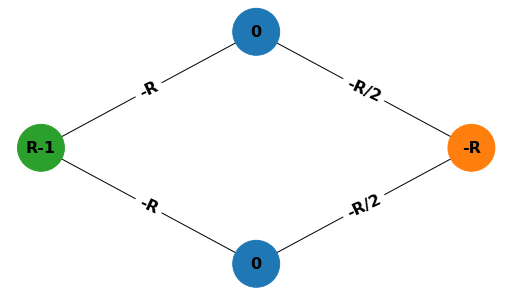

In [47]:
Nqb = 4
Rl = 6
hxl = 0.5
loop1 = ising_models.LoopGadget(Nqb,R=Rl,hx_init=hxl)
loop1.drawHpGraph()

Text(0.5, 1.0, 'Instantaneous Gaps')

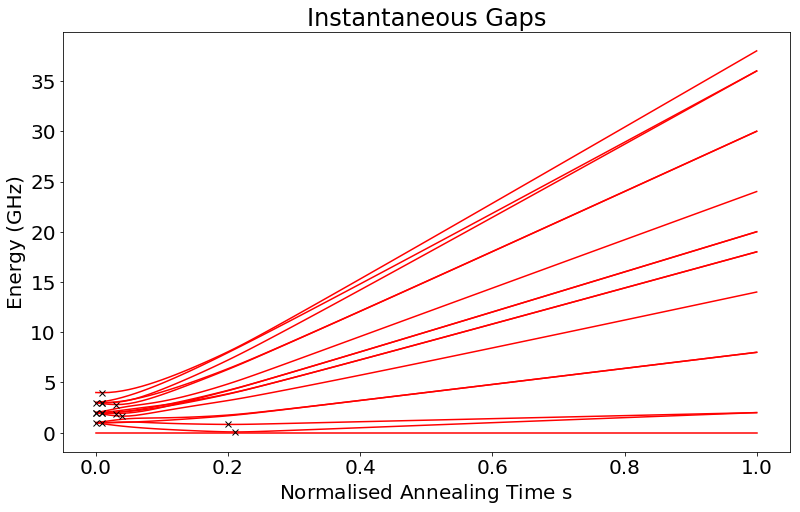

In [48]:
tan = 30.0 # ns
schedule_params = {"tan":tan,"stype":"linear"}
anneal_times = np.linspace(0,tan,101)

Eloop = loop1.annealInstantaneousGap(schedule_params, anneal_times)
Eloop_min = loop1.annealMinimumGaps(anneal_times, Eloop)

fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range(len(Eloop)):
    ax.plot(anneal_times/tan, Eloop[i]/(2*np.pi), "r-")
for i in range(len(Eloop_min)):
    ax.plot(Eloop_min[i][0]/tan, Eloop_min[i][1]/(2*np.pi), "kx")
ax.set_xlabel('Normalised Annealing Time $s$')
ax.set_ylabel('Energy (GHz)')
ax.set_title('Instantaneous Gaps')

In [49]:
print ("First gap:")
print (Eloop_min[0][1]/(2*np.pi))

First gap:
0.07826321785264564


Text(0.5, 1.0, 'First Instantaneous Gap')

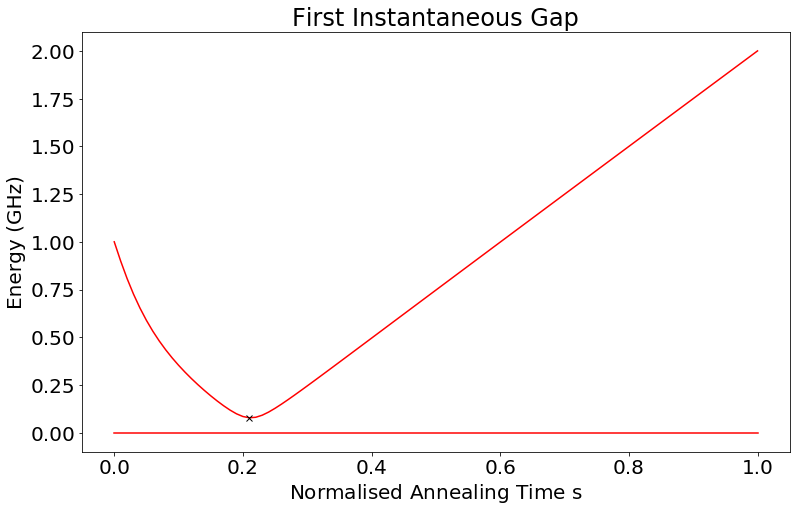

In [50]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range(2):
    ax.plot(anneal_times/tan, Eloop[i]/(2*np.pi), "r-")
for i in range(1):
    ax.plot(Eloop_min[i][0]/tan, Eloop_min[i][1]/(2*np.pi), "kx")
ax.set_xlabel('Normalised Annealing Time $s$')
ax.set_ylabel('Energy (GHz)')
ax.set_title('First Instantaneous Gap')

### Daniel Chain Gadget

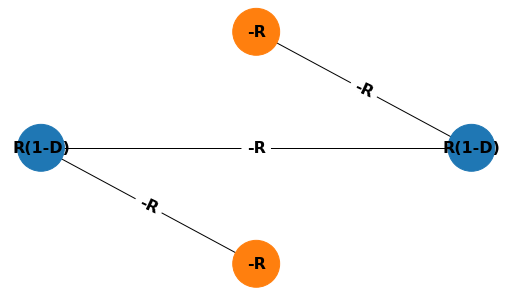

In [51]:
Rc = 6
D = 0.05
hxc = 0.5
chain1 = ising_models.ChainGadget(Nqb,R=Rc,D=D,hx_init=hxc)
chain1.drawHpGraph()

Text(0.5, 1.0, 'Instantaneous Gaps')

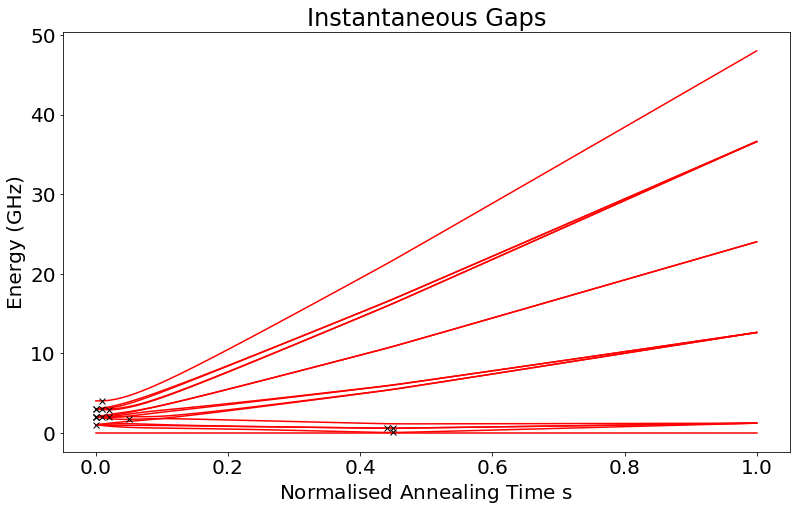

In [52]:
tan = 30.0 # ns
schedule_params = {"tan":tan,"stype":"linear"}
anneal_times = np.linspace(0,tan,101)

Echain = chain1.annealInstantaneousGap(schedule_params, anneal_times)
Echain_min = chain1.annealMinimumGaps(anneal_times, Echain)

fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range(len(Echain)):
    ax.plot(anneal_times/tan, Echain[i]/(2*np.pi), "r-")
for i in range(len(Echain_min)):
    ax.plot(Echain_min[i][0]/tan, Echain_min[i][1]/(2*np.pi), "kx")
ax.set_xlabel('Normalised Annealing Time $s$')
ax.set_ylabel('Energy (GHz)')
ax.set_title('Instantaneous Gaps')

In [53]:
print ("First gap:")
print (Echain_min[0][1]/(2*np.pi))

First gap:
0.03203231729670046


Text(0.5, 1.0, 'First Instantaneous Gap')

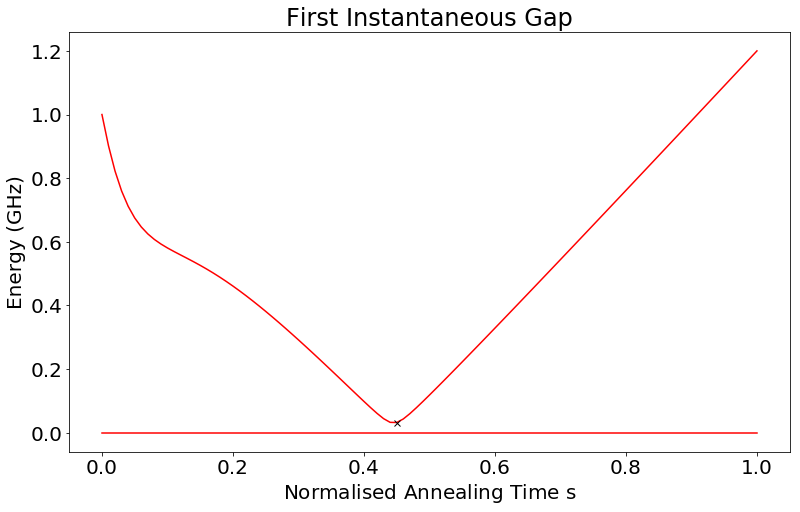

In [54]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range(2):
    ax.plot(anneal_times/tan, Echain[i]/(2*np.pi), "r-")
for i in range(1):
    ax.plot(Echain_min[i][0]/tan, Echain_min[i][1]/(2*np.pi), "kx")
ax.set_xlabel('Normalised Annealing Time $s$')
ax.set_ylabel('Energy (GHz)')
ax.set_title('First Instantaneous Gap')

### Direct Comparison

Text(0.5, 1.0, 'First Instantaneous Gap')

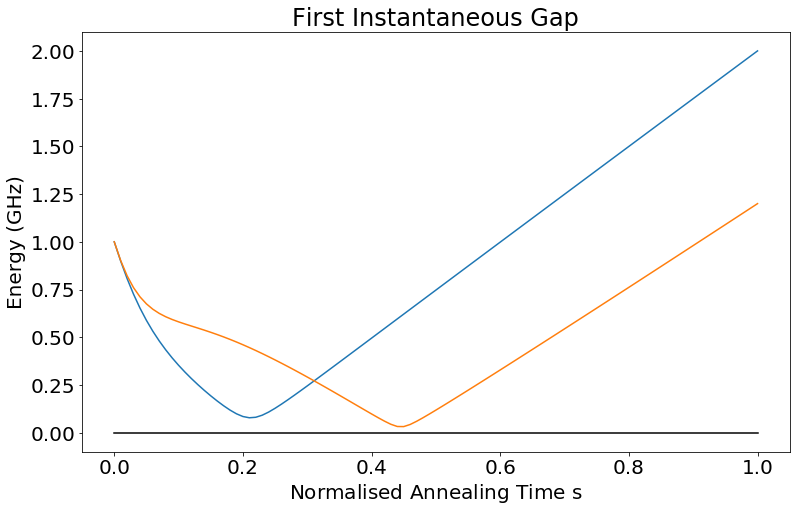

In [55]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
ax.plot(anneal_times/tan, Echain[0]/(2*np.pi), "k-")
ax.plot(anneal_times/tan, Eloop[1]/(2*np.pi), label="Loop Gadget")
ax.plot(anneal_times/tan, Echain[1]/(2*np.pi), label="Chain Gadget")
ax.set_xlabel('Normalised Annealing Time $s$')
ax.set_ylabel('Energy (GHz)')
ax.set_title('First Instantaneous Gap')

In [56]:
# Save this data
filename = "instantaneous_gaps.bin"
cparams = [Nqb,Rc,D,hxc]
lparams = [Nqb,Rl,hxl]
obj = {
    "chain":[
        cparams,
        [schedule_params,anneal_times,Echain,Echain_min]
    ],
    "loop":[
        lparams,
        [schedule_params,anneal_times,Eloop,Eloop_min]
    ]
}
sd.saveBin(obj,filename)

## Linear Schedules

We will apply the following linear schedule directly to the transverse and longitudinal parts of the Hamiltonian:

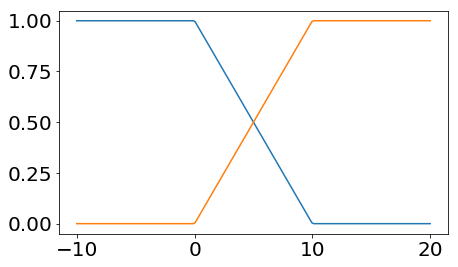

In [57]:
tan = 10
p = {"stype":"linear","tan":tan}
times = np.linspace(-tan,2*tan,201)
As = np.array([ising_schedules.A(t,p) for t in times])
Bs = np.array([ising_schedules.B(t,p) for t in times])
plt.plot(times,As)
plt.plot(times,Bs)

In [60]:
anneal_times = np.linspace(0.1,40.0,301)
p2 = loop1.annealStateProbability(p, anneal_times, timeit=True)
p1 = chain1.annealStateProbability(p, anneal_times, timeit=True)

Duration:	18.8 s
Duration:	20.1 s


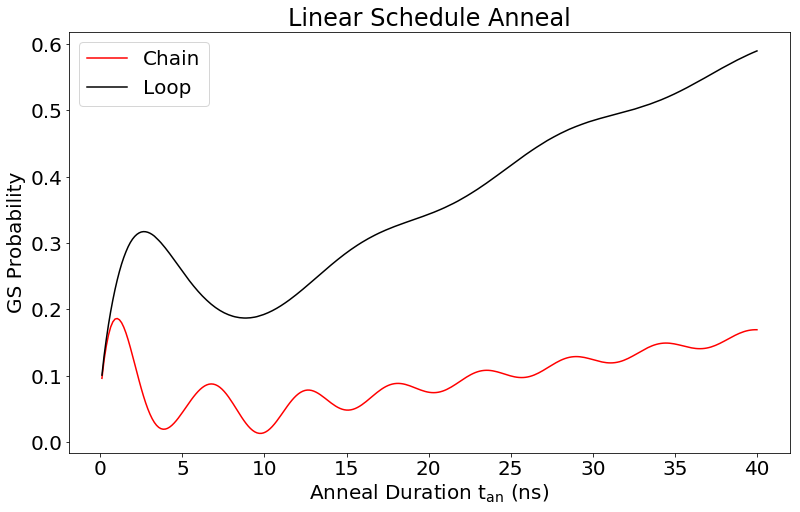

In [61]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
ax.plot(anneal_times, p1[0], "r-", label="Chain")
ax.plot(anneal_times, p2[0], "k-", label="Loop")
ax.set_xlabel('Anneal Duration $t_{an}$ (ns)')
ax.set_ylabel('GS Probability')
ax.set_title('Linear Schedule Anneal')
ax.legend()

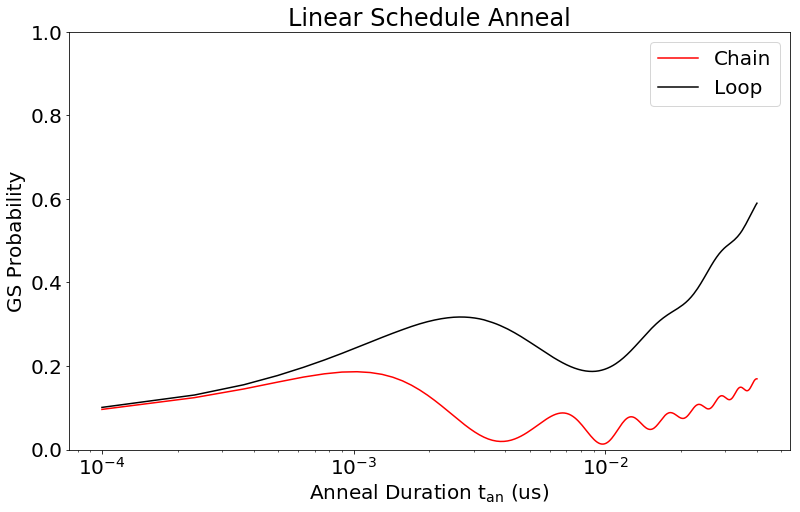

In [65]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
ax.plot(anneal_times/1000.0, p1[0], "r-", label="Chain")
ax.plot(anneal_times/1000.0, p2[0], "k-", label="Loop")
ax.set_xscale("log")
ax.set_ylim((0,1))
ax.set_xlabel('Anneal Duration $t_{an}$ (us)')
ax.set_ylabel('GS Probability')
ax.set_title('Linear Schedule Anneal')
ax.legend()

In [62]:
filename = "linear_anneal_1.bin"
obj = {
    "chain":[
        cparams,
        [anneal_times,p,p1]
    ],
    "loop":[
        lparams,
        [anneal_times,p,p2]
    ]
}
sd.saveBin(obj,filename)